In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import pyprojroot
import searchnets
import torch

import torch 
import torch.nn as nn
import torchvision

import torchvision.models as models
import torchvision.transforms as transforms

In [8]:
def normalize(img):
    img = (img - np.mean(img)) / np.std(img)
    img = img + 0.5
    img = np.maximum(0, img)
    img = np.minimum(1, img)
    return img

In [3]:
def channels_last(img):
    return img.transpose((1, 2, 0))

In [4]:
def plot_filters_multi_channel(t,
                               show=True):
    num_kernels = t.shape[0]    
    
    n_rows = n_cols = int(np.ceil(np.sqrt(num_kernels)))
    
    fig, ax_arr = plt.subplots(n_rows, n_cols)
    ax_arr = ax_arr.ravel()       

    t = t.cpu().numpy()
    for ind in range(num_kernels):
        filter_ = t[ind]
        filter_ = normalize(filter_)
        filter_ = channels_last(filter_)

        ax = ax_arr[ind]
        ax.imshow(filter_, aspect='auto')
        ax.axis('off')
        ax.set_axis_off()
    
    if show:
        plt.show()

In [5]:
def plot_weights(model, 
                 layer_num,
                 show=True):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]

  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data    
    plot_filters_multi_channel(weight_tensor, show=show)
        
  else:
    print("Can only visualize layers which are convolutional")

In [6]:
ckpts_root = pyprojroot.here() / 'results/searchstims/checkpoints/3stims'

visualizing filters for: alexnet trained on search stimuli, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_initialize_lr_1e-03_three_stims_38400samples_balanced


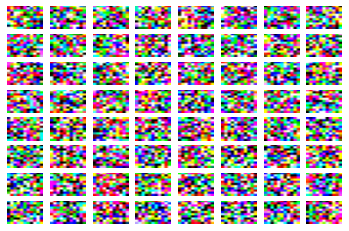

visualizing filters for: alexnet trained on search stimuli (classify), results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_searchstims_classify_38400samples_balanced


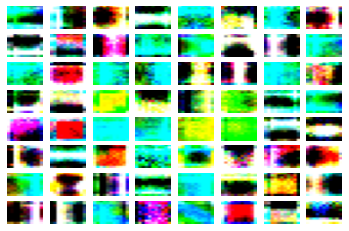

visualizing filters for: alexnet trained on ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced


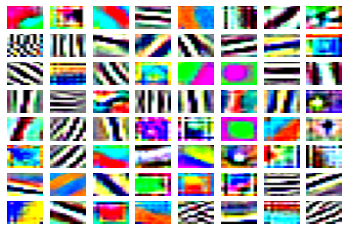

visualizing filters for: alexnet trained on Stylized ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_SIN_three_stims_38400samples_balanced


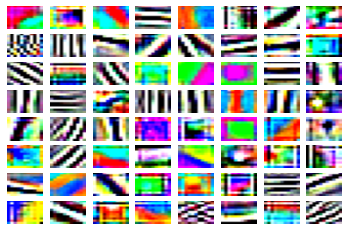

visualizing filters for: alexnet trained on random weights, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_random_three_stims_38400samples_balanced


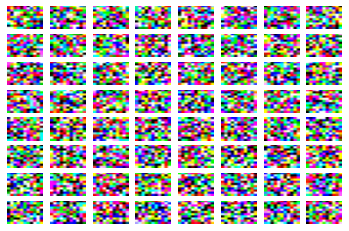

visualizing filters for: alexnet trained on DomainNet, Clipart domain, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_Clipart_three_stims_38400samples_balanced


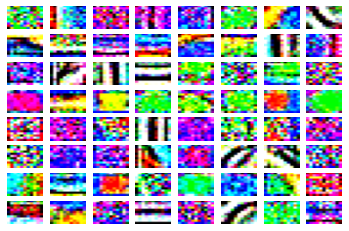

visualizing filters for: VGG16 trained on search stimuli, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_initialize_lr_1e-03_three_stims_38400samples_balanced


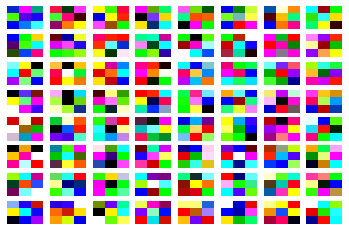

visualizing filters for: VGG16 trained on search stimuli (classify), results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_searchstims_classify_38400samples_balanced


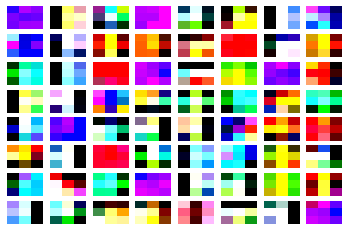

visualizing filters for: VGG16 trained on ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced


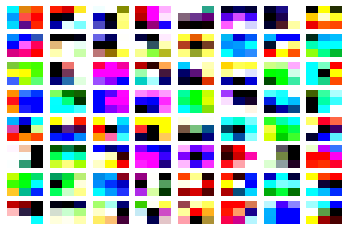

visualizing filters for: VGG16 trained on Stylized ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_SIN_three_stims_38400samples_balanced


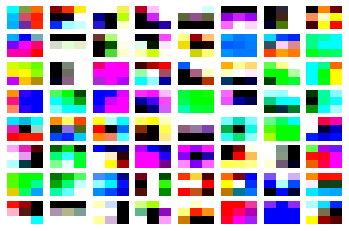

visualizing filters for: VGG16 trained on random weights, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_random_three_stims_38400samples_balanced


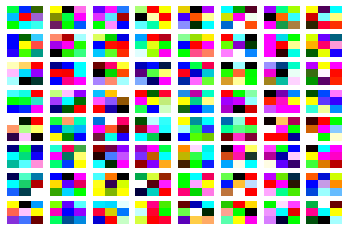

visualizing filters for: VGG16 trained on DomainNet, Clipart domain, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_Clipart_three_stims_38400samples_balanced


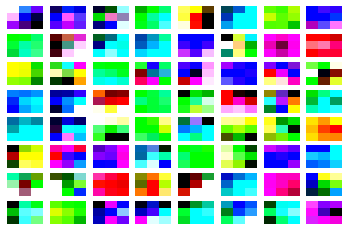

In [9]:
for net_name in ('alexnet', 'VGG16'):
    results_dirs = {
        'search stimuli': f'{net_name}_initialize_lr_1e-03_three_stims_38400samples_balanced',
        'search stimuli (classify)': f'{net_name}_transfer_lr_1e-03_searchstims_classify_38400samples_balanced',
        'ImageNet': f'{net_name}_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced',
        'Stylized ImageNet': f'{net_name}_transfer_lr_1e-03_SIN_three_stims_38400samples_balanced',
        'random weights': f'{net_name}_transfer_lr_1e-03_random_three_stims_38400samples_balanced',
        'DomainNet, Clipart domain': f'{net_name}_transfer_lr_1e-03_Clipart_three_stims_38400samples_balanced',
    }

    for stim_type, results_dir in results_dirs.items():
        results_dir = ckpts_root / results_dir
        print(f'visualizing filters for: {net_name} trained on {stim_type}, results dir: {results_dir}')
        replicates = sorted(results_dir.joinpath('trained_200_epochs').glob('net_number*/*best-val*pt'))

        # for net_number, ckpt_path in enumerate(replicates):
        ckpt_path = replicates[0]
        sd = torch.load(ckpt_path)
        sd = {k.replace('module.', ''): v for k, v in sd['model'].items()}

        if net_name == 'alexnet':
            model = searchnets.nets.alexnet.build(num_classes=2)
        elif net_name == 'VGG16':
            model = searchnets.nets.vgg16.build(num_classes=2)
        model.load_state_dict(sd);
        model.eval()

        #visualize weights for alexnet - first conv layer
        plot_weights(model, layer_num=0)

In [6]:
split_df = pd.read_csv(
    pyprojroot.here() / '../visual_search_stimuli/alexnet_multiple_stims/alexnet_three_stims_38400samples_balanced_split.csv'
)

In [7]:
from pathlib import Path

import imageio
import torchvision.transforms

In [84]:
N_TEST_IMGS = 4

test_imgs = []

root_output_dir = Path(split_df.iloc[1].root_output_dir)

for stim in split_df.stimulus.unique():
    for set_size in split_df.set_size.unique():
        for target_condition in split_df.target_condition.unique():
            this_df = split_df[
                (split_df.stimulus == stim) &
                (split_df.set_size == set_size) & 
                (split_df.target_condition == target_condition) & 
                (split_df.split == 'test')
            ]
            for row_ind in range(N_TEST_IMGS):
                test_imgs.append(
                    imageio.imread(
                        root_output_dir / this_df.iloc[row_ind].img_file
                    )
                )

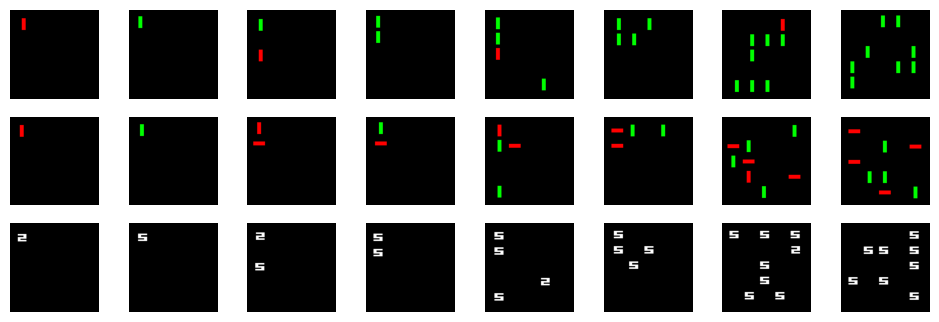

In [9]:
fig, ax_arr = plt.subplots(3, 8, figsize=(12, 4), dpi=100)
ax_arr = ax_arr.ravel()

for ind, test_img in enumerate(test_imgs):
    ax_arr[ind].imshow(test_img)
    ax_arr[ind].set_axis_off()

In [10]:
ALEXNET_LAYERS = {
    0: 'Conv_1_1',
    3: 'Conv_2_1',
    6: 'Conv_3_1',
    8: 'Conv_4_1',
    10: 'Conv_5_1',
}

VGG16_LAYERS = {
    0: 'Conv_1_1',
    2: 'Conv_1_2',
    5: 'Conv_2_1',
    7: 'Conv_2_2',
    10: 'Conv_3_1',
    12: 'Conv_3_2',
    14: 'Conv_3_3',
    17: 'Conv_4_1',
    19: 'Conv_4_2',
    21: 'Conv_4_3',
    24: 'Conv_5_1',
    26: 'Conv_5_2',
    28: 'Conv_5_3',
}

In [11]:
from collections import defaultdict

In [85]:
activation_hook_dst = {}
def get_activation(name):
    def hook(model, input, output):
        activation_hook_dst[name] = output.detach()
    return hook

tensorizer = torchvision.transforms.ToTensor()


activations_net = {}
for net_name in ('alexnet', 'VGG16'):
    activations_stim = {}
    results_dirs = {
        'search stimuli (classify)': f'{net_name}_transfer_lr_1e-03_searchstims_classify_38400samples_balanced',
        'ImageNet': f'{net_name}_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced',
#         'Stylized ImageNet': f'{net_name}_transfer_lr_1e-03_SIN_three_stims_38400samples_balanced',
#         'random weights': f'{net_name}_transfer_lr_1e-03_random_three_stims_38400samples_balanced',
#         'DomainNet, Clipart domain': f'{net_name}_transfer_lr_1e-03_Clipart_three_stims_38400samples_balanced',
    }

    for stim_type, results_dir in results_dirs.items():
        results_dir = ckpts_root / results_dir
        print(f'getting filter activations for: {net_name} trained on {stim_type}, results dir: {results_dir}')
        replicates = sorted(results_dir.joinpath('trained_200_epochs').glob('net_number*/*best-val*pt'))

        # for net_number, ckpt_path in enumerate(replicates):
        ckpt_path = replicates[0]
        sd = torch.load(ckpt_path)
        sd = {k.replace('module.', ''): v for k, v in sd['model'].items()}

        if net_name == 'alexnet':
            model = searchnets.nets.alexnet.build(num_classes=2)
            layers_dict = ALEXNET_LAYERS
        elif net_name == 'VGG16':
            model = searchnets.nets.vgg16.build(num_classes=2)
            layers_dict = VGG16_LAYERS
        model.load_state_dict(sd);
        model.eval()

        layers_to_get = []
        for model_ind, layer_name in layers_dict.items():
            model.features[model_ind].register_forward_hook(get_activation(layer_name))
            layers_to_get.append(layer_name)

        activations_layer = defaultdict(list)
            
        for x in test_imgs:
            x = tensorizer(x)
            x = x.unsqueeze(0)
            with torch.no_grad():
                out = model(x)
                for layer_name in layers_to_get:
                    act_arr = activation_hook_dst[layer_name].cpu().numpy()
                    act_arr = np.squeeze(act_arr)
                    activations_layer[layer_name].append(act_arr)

        activations_stim[stim_type] = activations_layer

    activations_net[net_name] = activations_stim

getting filter activations for: alexnet trained on search stimuli (classify), results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_searchstims_classify_38400samples_balanced
getting filter activations for: alexnet trained on ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/alexnet_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced
getting filter activations for: VGG16 trained on search stimuli (classify), results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_searchstims_classify_38400samples_balanced
getting filter activations for: VGG16 trained on ImageNet, results dir: /home/bart/Documents/repos/coding/L2M/Nicholson-Prinz-2021/results/searchstims/checkpoints/3stims/VGG16_transfer_lr_1e-03_no_finetune_three_stims_38400samples_balanced


In [71]:
alex_conv1 = {
    stim_type: activations_net['alexnet'][stim_type]['Conv_1_1']
    for stim_type in stim_types
}

N_IMG_TO_SHOW = 4

for n in range(N_IMG_TO_SHOW):
fig, ax_arr = plt.subplots(3, 8, figsize=(12, 4), dpi=150)
ax_arr = ax_arr.ravel()

for ind, test_img in enumerate(act_stim_vgg16):
    if ind > 23:
        break
    ax_arr[ind].imshow(test_img)
    ax_arr[ind].set_axis_off()

24

In [ ]:
act_stim_vgg16 = activations_net['VGG16']['search stimuli (classify)'][0]
act_stim_vgg16 = np.squeeze(act_stim_vgg16)

In [13]:
def compare_activations(stim_types=('ImageNet', 'search stimuli (classify)'),
                        layer_name='Conv_1_1', 
                        n_maps_to_show=64,
                        n_test_imgs=24,
                        random=False,
                        figsize=(4, 4),
                        dpi=150
                       ):
    act_arrs = {}
    
    to_show = []
    for test_img_ind in range(n_test_imgs):
        act_per_stim_type = []
        for stim_type in stim_types:
            act_arr_list = activations_net['alexnet'][stim_type][layer_name]
            act_arr = act_arr_list[test_img_ind][:n_maps_to_show]
            act_per_stim_type.append(act_arr)
        to_show.append(act_per_stim_type)

    for act_per_stim_type in to_show:
        for stim_type, act_arr in zip(stim_types, act_per_stim_type):
            n_row = n_col = int(np.ceil(np.sqrt(n_maps_to_show)))

            fig, ax_arr = plt.subplots(n_row, n_col, figsize=figsize, dpi=dpi)
            ax_arr = ax_arr.ravel()

            for ind, act_map in enumerate(act_arr):
                ax_arr[ind].imshow(act_map)
                ax_arr[ind].set_axis_off()

            fig.suptitle(
                f'activation maps from AlexNet trained on {stim_type}, layer: {layer_name}', y=0.95
            )

In [14]:
def hist_act(stim_types=('ImageNet', 'search stimuli (classify)'),
             layer_name='Conv_1_1',
             n_test_imgs=24,
             hist_kwargs={'bins': 25}):
    if hist_kwargs is None:
        hist_kwargs = {}

    act_hist = {}
    
    for stim_type in stim_types:
        act_arr_list = activations_net['alexnet'][stim_type][layer_name]
        # flatten each tensor of activation maps (1 n-d array per image) into a 1-D vector
        act_arr_list = [act_map_arr.ravel() for act_map_arr in act_arr_list]
        # then histogram each of those vectors
        act_hist_list = [
            np.histogram(act_map, **hist_kwargs) for act_map in act_arr_list
        ]
        act_hist[stim_type] = act_hist_list
    
    return act_hist

In [15]:
def vec_act(stim_types=('ImageNet', 'search stimuli (classify)'),
             layer_name='Conv_1_1',
             n_test_imgs=24):
    act_vec = {}

    for stim_type in stim_types:
        act_arr_list = activations_net['alexnet'][stim_type][layer_name]
        # flatten each tensor of activation maps (1 n-d array per image) into a 1-D vector
        act_arr_list = [act_map_arr.ravel() for act_map_arr in act_arr_list]
        act_vec[stim_type] = act_arr_list
    
    return act_vec

In [ ]:
def vec_act(stim_types=('ImageNet', 'search stimuli (classify)'),
             layer_name='Conv_1_1',
             n_test_imgs=24):
    act_vec = {}

    for stim_type in stim_types:
        act_arr_list = activations_net['alexnet'][stim_type][layer_name]
        # flatten each tensor of activation maps (1 n-d array per image) into a 1-D vector
        act_arr_list = [act_map_arr.ravel() for act_map_arr in act_arr_list]
        act_vec[stim_type] = act_arr_list
    
    return act_vec

In [86]:
def map_s_df(net_name='alexnet',
             stim_types=('ImageNet', 'search stimuli (classify)'),
             layer_name='Conv_1_1',
             base=10):
    records = []

    for stim_type in stim_types:
        act_maps_list = activations_net[net_name][stim_type][layer_name]
        # flatten each tensor of activation maps (1 n-d array per image) into a 1-D vector
        for test_img_num, act_maps in enumerate(act_maps_list):
            for map_num, act_map in enumerate(act_maps):
                _, counts = np.unique(act_map, return_counts=True)
                S = entropy(pk=counts, base=base)
                records.append(
                    {
                        'net_name': net_name,
                        'stim_type': stim_type,
                        'layer': layer_name,
                        'test_img_num': test_img_num,
                        'map_num': map_num,
                        'S': S
                    }
                )
    
    df = pd.DataFrame.from_records(records)
    return df

In [96]:
dfs = []
for layer_name in list(ALEXNET_LAYERS.values()):
    df = map_s_df(layer_name=layer_name)
    dfs.append(df)

df = pd.concat(dfs)

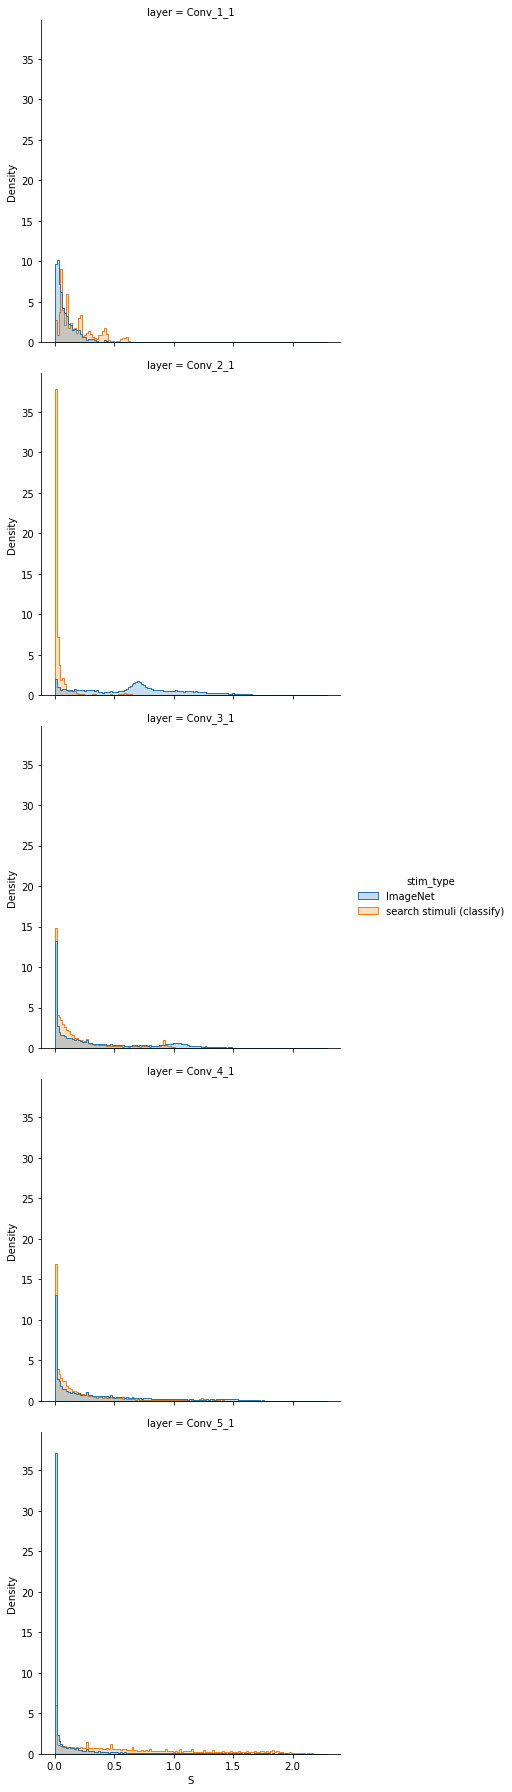

In [97]:
sns.displot(
    data=df,
    x='S',
    hue='stim_type',
    element='step',
#    fill=False,
    stat="density",
    common_norm=False,
    row='layer',
)

In [98]:
dfs = []
for layer_name in list(VGG16_LAYERS.values()):
    df = map_s_df(net_name='VGG16', layer_name=layer_name)
    dfs.append(df)

df = pd.concat(dfs)



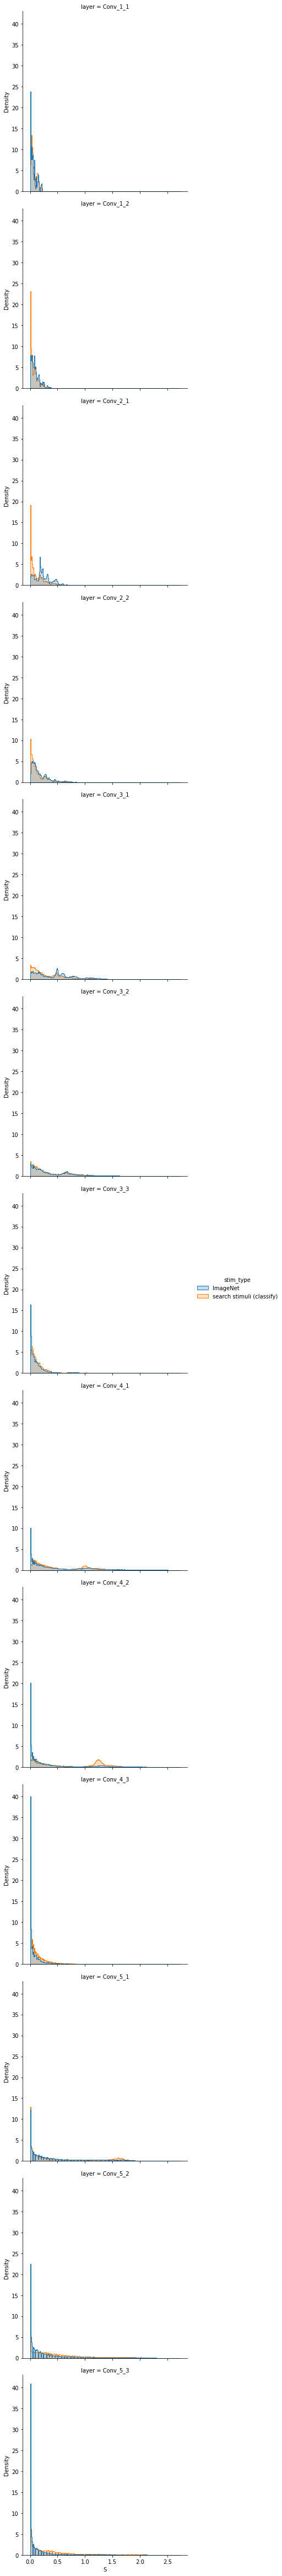

In [99]:
sns.displot(
    data=df,
    x='S',
    hue='stim_type',
    element='step',
#    fill=False,
    stat="density",
    common_norm=False,
    row='layer',
)

In [16]:
act_vec = vec_act()

In [1]:
# TODO: plot with log x-axis!

In [68]:
an_act_vec.min()

2.3027882e-05

In [74]:
from scipy.stats import entropy

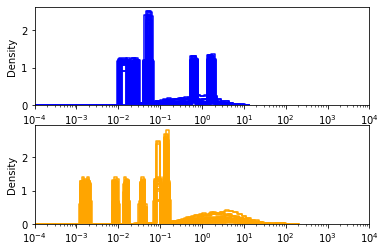

In [65]:
N_TO_TEST = 64

EPSILON = 1e-6

fig, ax_arr = plt.subplots(2, 1)
ax_arr = ax_arr.ravel()

stim_types=('ImageNet', 'search stimuli (classify)')
color_map = dict(zip(stim_types, ('blue', 'orange')))

for ax_ind, (stim_type, act_vecs) in enumerate(act_vec.items()):
    for an_act_vec in act_vecs[:N_TO_TEST]:
        an_act_vec = an_act_vec[an_act_vec > EPSILON]
        sns.histplot(x=an_act_vec,
                     element='step',
                     fill=False,
                     log_scale=True,
                     color=color_map[stim_type],
                     label=stim_type,
                     stat="density", 
                     common_norm=False,
                     ax=ax_arr[ax_ind])

for ax in ax_arr:
    ax.set_xlim([10e-5,10e3])

In [ ]:
act_stim_vgg16 = activations_out_net['VGG16']['search stimuli (classify)'][0]
act_stim_vgg16 = np.squeeze(act_stim_vgg16)

In [90]:
act_stim_vgg16 = activations_out_net['VGG16']['search stimuli (classify)'][0]
act_stim_vgg16 = np.squeeze(act_stim_vgg16)

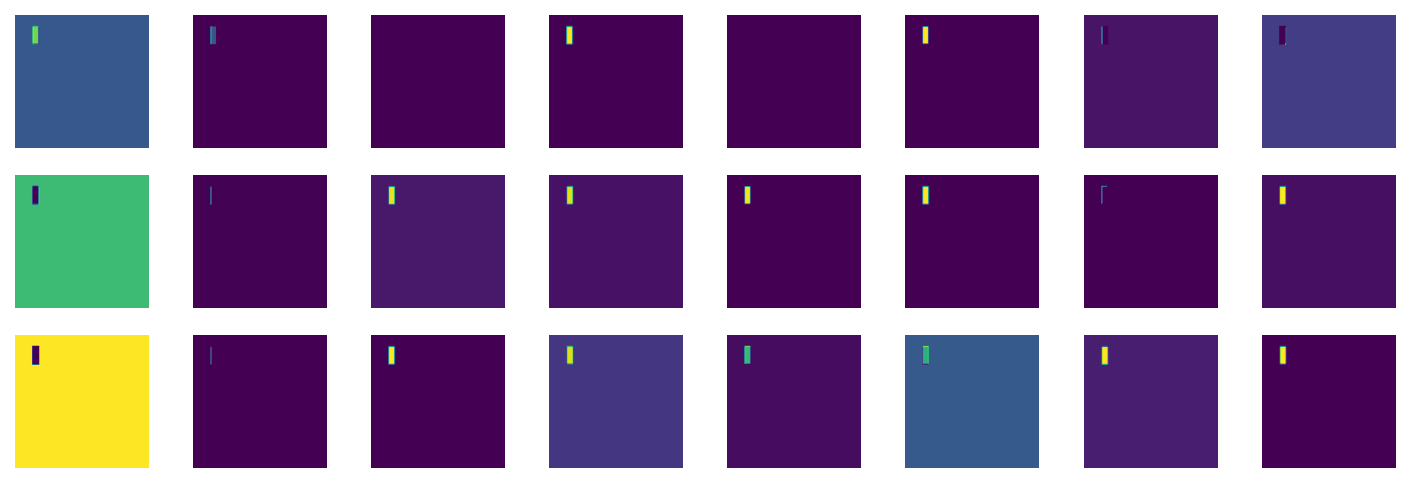

In [91]:
fig, ax_arr = plt.subplots(3, 8, figsize=(12, 4), dpi=150)
ax_arr = ax_arr.ravel()

for ind, test_img in enumerate(act_stim_vgg16):
    if ind > 23:
        break
    ax_arr[ind].imshow(test_img)
    ax_arr[ind].set_axis_off()

In [92]:
act_imgnet_vgg16 = activations_out_net['VGG16']['ImageNet'][0]
act_imgnet_vgg16 = np.squeeze(act_imgnet_vgg16)

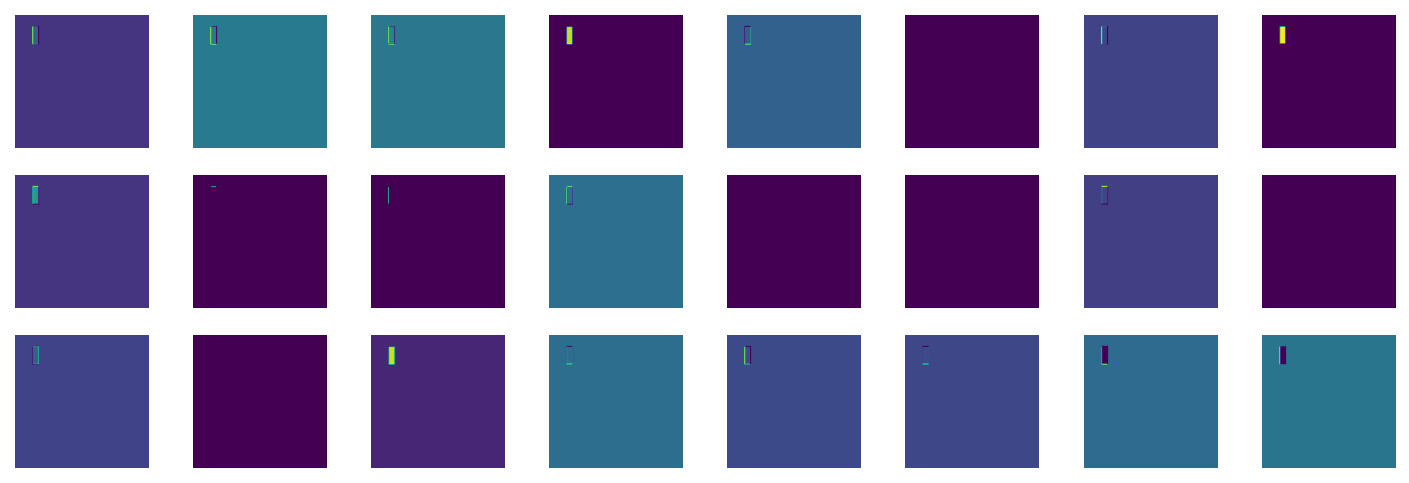

In [93]:
fig, ax_arr = plt.subplots(3, 8, figsize=(12, 4), dpi=150)
ax_arr = ax_arr.ravel()

for ind, test_img in enumerate(act_imgnet_vgg16):
    if ind > 23:
        break
    ax_arr[ind].imshow(test_img)
    ax_arr[ind].set_axis_off()

In [87]:
act_imgnet = activations_out_net['alexnet']['ImageNet'][0]
act_imgnet = np.squeeze(act_imgnet)

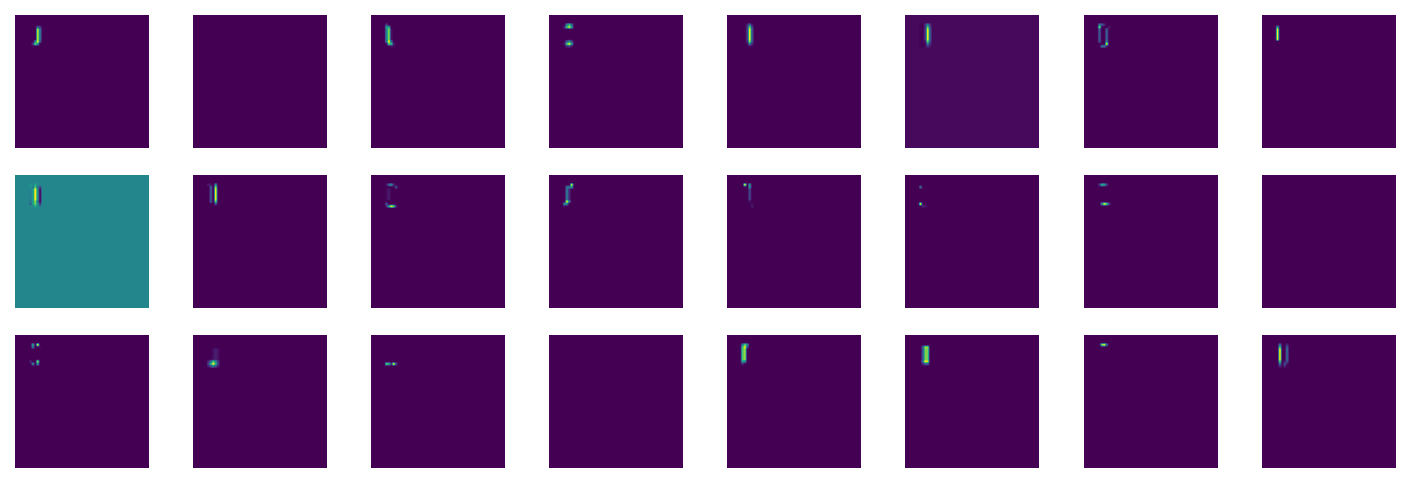

In [88]:
fig, ax_arr = plt.subplots(3, 8, figsize=(12, 4), dpi=150)
ax_arr = ax_arr.ravel()

for ind, test_img in enumerate(act_imgnet):
    if ind > 23:
        break
    ax_arr[ind].imshow(test_img)
    ax_arr[ind].set_axis_off()

In [81]:
records = []

for net_name, activations_out in activations_out_net.items():
    for stim_type, activations_list in activations_out.items():
        for img_num, activations_arr in enumerate(activations_list):
            activations_arr = np.squeeze(activations_arr)
            for channel_num, channel in enumerate(activations_arr):
                records.append(
                    {
                        'net_name': net_name,
                        'stim_type': stim_type,
                        'img_num': img_num,
                        'channel_num': channel_num,
                        'activation_mean': channel.mean(),
                        'activation_std': channel.std(),
                    }
                )

activations_df = pd.DataFrame.from_records(records)

In [82]:
activations_df

,net_name,stim_type,img_num,channel_num,activation_mean,activation_std
0,alexnet,search stimuli (classify),0,0,0.000000,0.000000
1,alexnet,search stimuli (classify),0,1,0.001461,0.020682
2,alexnet,search stimuli (classify),0,2,0.044955,0.451692
3,alexnet,search stimuli (classify),0,3,0.049731,0.484507
4,alexnet,search stimuli (classify),0,4,0.000000,0.000000
...,...,...,...,...,...,...
24571,VGG16,ImageNet,95,59,0.533775,0.158805
24572,VGG16,ImageNet,95,60,0.001951,0.017067
24573,VGG16,ImageNet,95,61,0.014666,0.027277
24574,VGG16,ImageNet,95,62,0.000000,0.000000


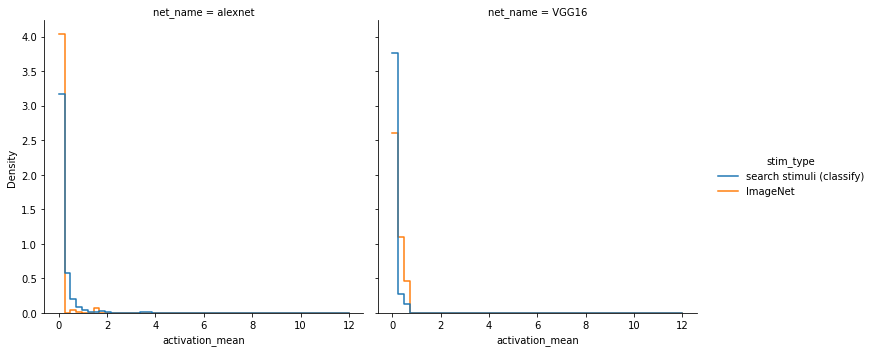

In [84]:
sns.displot(
    data=activations_df,
    x='activation_mean',
    hue='stim_type',
   element='step',
    bins=50,
    stat="density", 
    common_norm=False,
   fill=False,
    col='net_name',
#    kind="ecdf",
)

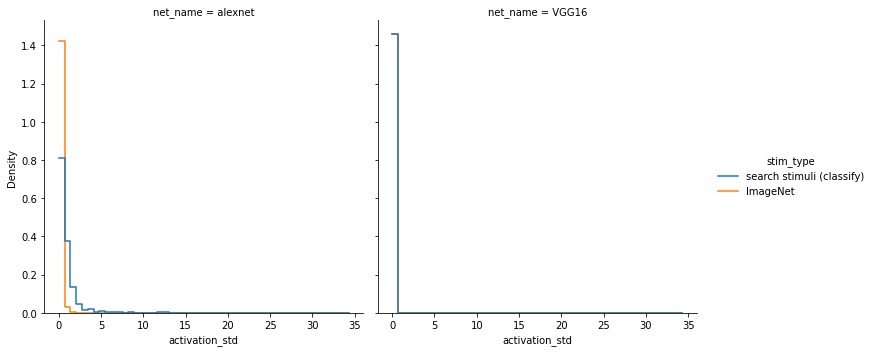

In [94]:
sns.displot(
    data=activations_df,
    x='activation_std',
    hue='stim_type',
   element='step',
    bins=50,
    stat="density", 
    common_norm=False,
   fill=False,
    col='net_name',
#    kind="ecdf",
)

In [95]:
activations_df['cv'] = activations_df.activation_std / activations_df.activation_mean

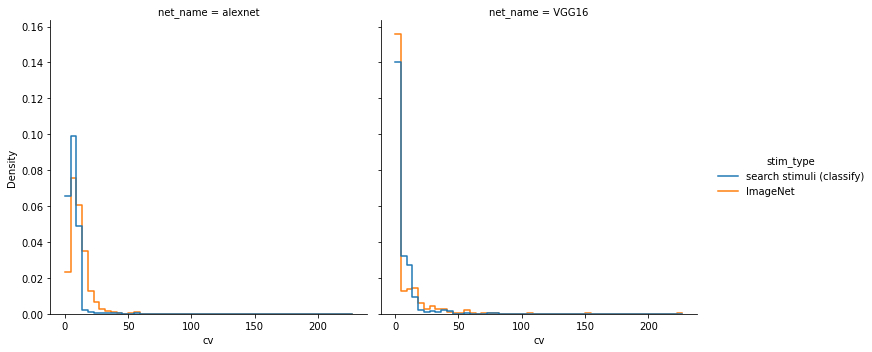

In [96]:
sns.displot(
    data=activations_df,
    x='cv',
    hue='stim_type',
   element='step',
    bins=50,
    stat="density", 
    common_norm=False,
   fill=False,
    col='net_name',
#    kind="ecdf",
)

In [ ]:
# TODO: look at later layers